In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('COVID-19_Vaccination_Demographics_in_the_United_States_National.csv')

In [3]:
df.size

236160

In [4]:
df.shape

(14760, 16)

In [5]:
df

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
0,04/18/2022,Race_eth_NHOther,"7,685,824",4.0,3.0,"6,436,251",NaN,NaN,3.8,2.9,46.0,3.2,3.8,2.9,"2,837,897","24,185"
1,04/18/2022,Ages_75+_yrs,"22,841,361",8.9,8.9,"19,803,385",95.0,86.5,9.0,9.0,70.4,14.0,9.4,18.6,"13,935,866","173,817"
2,04/18/2022,Ages_<5yrs,"87,366",0.0,0.0,"40,760",0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,04/18/2022,Race_eth_known,"191,071,966",99.9,74.4,"170,186,280",NaN,NaN,99.9,77.7,54.4,99.9,99.9,99.9,"88,794,033","839,721"
4,04/18/2022,Ages_<12yrs,"10,135,524",3.9,3.9,"8,155,961",20.9,16.8,3.7,3.7,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,12/13/2020,Race_eth_NHAsian,739,3.7,2.8,220,0.0,0.0,4.5,3.4,0.0,0.0,4.5,0.0,0,0
14756,12/13/2020,Race_eth_NHAIAN,269,1.4,1.0,43,0.0,0.0,0.9,0.7,0.0,0.0,0.9,0.0,0,0
14757,12/13/2020,Age_unknown,6,0.0,0.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0
14758,12/13/2020,Sex_Male,"10,726",41.3,40.9,"3,158",0.0,0.0,49.9,49.2,0.0,0.0,49.8,0.0,0,0


In [6]:
df.replace(',','', regex=True, inplace=True)

In [7]:
df['Series_Complete_Yes'] = pd.to_numeric(df['Series_Complete_Yes'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14760 entries, 0 to 14759
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    14760 non-null  object 
 1   Demographic_category                    14760 non-null  object 
 2   Administered_Dose1                      14760 non-null  object 
 3   Administered_Dose1_pct_known            14268 non-null  float64
 4   Administered_Dose1_pct_US               14760 non-null  float64
 5   Series_Complete_Yes                     14760 non-null  int64  
 6   Administered_Dose1_pct_agegroup         10824 non-null  float64
 7   Series_Complete_Pop_pct_agegroup        10824 non-null  float64
 8   Series_Complete_Pop_Pct_known           14268 non-null  float64
 9   Series_Complete_Pop_Pct_US              14760 non-null  float64
 10  Booster_Doses_Vax_pct_agegroup          14760 non-null  fl

In [9]:
df.isna().sum()

Date                                         0
Demographic_category                         0
Administered_Dose1                           0
Administered_Dose1_pct_known               492
Administered_Dose1_pct_US                    0
Series_Complete_Yes                          0
Administered_Dose1_pct_agegroup           3936
Series_Complete_Pop_pct_agegroup          3936
Series_Complete_Pop_Pct_known              492
Series_Complete_Pop_Pct_US                   0
Booster_Doses_Vax_pct_agegroup               0
Booster_Doses_Pop_Pct_known                492
Booster_Doses_Vax_Pct_US                     0
Booster_Doses_Pop_Pct_known_Last14Days     492
Booster_Doses_Yes                            0
Booster_Doses_Yes_Last14Days                 0
dtype: int64

In [10]:
df = df.dropna(axis=0)

In [11]:
values = ['Sex_known', 'Age_known', 'Race__eth_known']
df = df[df.Demographic_category.isin(values) == False]
df

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
1,04/18/2022,Ages_75+_yrs,22841361,8.9,8.9,19803385,95.0,86.5,9.0,9.0,70.4,14.0,9.4,18.6,13935866,173817
2,04/18/2022,Ages_<5yrs,87366,0.0,0.0,40760,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,04/18/2022,Ages_<12yrs,10135524,3.9,3.9,8155961,20.9,16.8,3.7,3.7,0.0,0.0,0.0,0.0,0,0
5,04/18/2022,Ages_5-11_yrs,10041944,3.9,3.9,8113688,34.9,28.2,3.7,3.7,0.0,0.0,0.0,0.0,0,0
6,04/18/2022,Sex_Male,121706763,47.8,47.4,103462868,74.5,63.3,47.6,47.3,45.2,45.2,47.5,45.6,44908508,424993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14754,12/13/2020,Race_eth_NHBlack,1553,7.8,5.9,394,0.0,0.0,8.1,6.1,0.0,0.0,8.1,0.0,0,0
14755,12/13/2020,Race_eth_NHAsian,739,3.7,2.8,220,0.0,0.0,4.5,3.4,0.0,0.0,4.5,0.0,0,0
14756,12/13/2020,Race_eth_NHAIAN,269,1.4,1.0,43,0.0,0.0,0.9,0.7,0.0,0.0,0.9,0.0,0,0
14758,12/13/2020,Sex_Male,10726,41.3,40.9,3158,0.0,0.0,49.9,49.2,0.0,0.0,49.8,0.0,0,0


In [12]:
values_male_female = ['Sex_Female', 'Sex_Male']
df_male_female = df[df.Demographic_category.isin(values_male_female) == True]
df_male_female[['Date', 'Demographic_category', 'Series_Complete_Yes']]

,Date,Demographic_category,Series_Complete_Yes
6,04/18/2022,Sex_Male,103462868
17,04/18/2022,Sex_Female,113938905
51,04/17/2022,Sex_Female,113938905
56,04/17/2022,Sex_Male,103462868
71,04/16/2022,Sex_Female,113938675
...,...,...,...
14674,12/15/2020,Sex_Male,3350
14709,12/14/2020,Sex_Female,3246
14716,12/14/2020,Sex_Male,3207
14752,12/13/2020,Sex_Female,3173


,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
6,04/18/2022,Sex_Male,121706763,47.8,47.4,103462868,74.5,63.3,47.6,47.3,45.2,45.2,47.5,45.6,44908508,424993
17,04/18/2022,Sex_Female,132830056,52.2,51.7,113938905,78.8,67.6,52.4,52.0,49.5,54.8,52.5,54.4,54386619,507565


<AxesSubplot:xlabel='Demographic_category'>

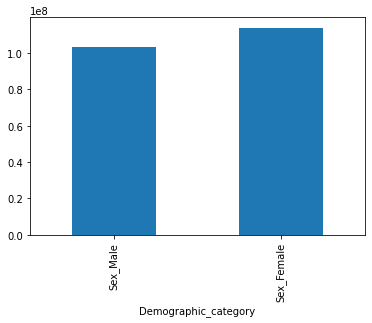

In [13]:
display(df_male_female.loc[df['Date']=='04/18/2022'])
df_male_female.loc[df['Date']=='04/18/2022'].plot.bar(y='Series_Complete_Yes', x='Demographic_category',legend=False)

In [14]:
df['Demographic_category'].value_counts()

Ages_75+_yrs              492
Sex_Female                492
Race_eth_Hispanic         492
Race_eth_NHMultiracial    492
Ages_12-15_yrs            492
Ages_18-24_yrs            492
Race_eth_NHAIAN           492
Ages_65-74_yrs            492
Ages_50-64_yrs            492
Ages_25-39_yrs            492
Race_eth_NHBlack          492
Ages_<5yrs                492
Ages_40-49_yrs            492
Race_eth_NHAsian          492
Race_eth_NHWhite          492
Race_eth_NHNHOPI          492
Ages_16-17_yrs            492
Sex_Male                  492
Ages_5-11_yrs             492
Ages_<12yrs               492
Ages_12-17_yrs            492
Name: Demographic_category, dtype: int64

In [15]:
values_age = ['Ages_5-11_yrs', 'Ages_12-17_yrs', 'Ages_18-24_yrs', 'Ages_25-39_yrs', 
              'Ages_40-49_yrs', 'Ages_50-64_yrs', 'Ages_65-74_yrs', 'Ages_75+_yrs']
df_age = df[df.Demographic_category.isin(values_age) == True]
df_age_last_updated=df_age.loc[df['Date']=='04/18/2022']
display(df_age_last_updated)

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
1,04/18/2022,Ages_75+_yrs,22841361,8.9,8.9,19803385,95.0,86.5,9.0,9.0,70.4,14.0,9.4,18.6,13935866,173817
5,04/18/2022,Ages_5-11_yrs,10041944,3.9,3.9,8113688,34.9,28.2,3.7,3.7,0.0,0.0,0.0,0.0,0,0
11,04/18/2022,Ages_40-49_yrs,35243067,13.7,13.7,30311584,86.4,74.3,13.8,13.8,43.4,13.2,14.4,8.0,13157088,74758
19,04/18/2022,Ages_25-39_yrs,54560866,21.2,21.2,45589574,79.8,66.7,20.8,20.8,35.5,16.3,21.6,12.1,16172116,113414
20,04/18/2022,Ages_50-64_yrs,59075645,23.0,23.0,51484173,92.8,80.9,23.5,23.5,52.7,27.3,24.4,24.6,27119244,229435
21,04/18/2022,Ages_65-74_yrs,33699100,13.1,13.1,29388349,95.0,92.2,13.4,13.4,66.5,19.6,13.9,24.7,19543643,230833
23,04/18/2022,Ages_18-24_yrs,23819821,9.3,9.3,19322099,77.9,63.2,8.8,8.8,30.8,6.0,9.2,5.7,5956437,52969
29,04/18/2022,Ages_12-17_yrs,17430472,6.8,6.8,14880073,68.9,58.8,6.8,6.8,24.2,3.6,7.1,6.3,3594799,58475


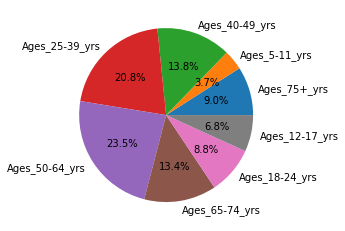

In [16]:
plt.pie(df_age_last_updated['Series_Complete_Yes'],
        labels=df_age_last_updated['Demographic_category'], 
        autopct = '%1.1f%%')
plt.show()

In [17]:
values_race = ['Race_eth_NHAsian', 'Race_eth_NHWhite', 'Race_eth_NHBlack', 'Race_eth_NHAIAN', 
               'Race_eth_NHMult_Oth', 'Race_eth_Hispanic', 'Race_eth_NHNHOPI']
df_race = df[df.Demographic_category.isin(values_race) == True]
df_race_last_updated = df_race.loc[df['Date']=='04/18/2022']
display(df_race_last_updated)

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
8,04/18/2022,Race_eth_NHNHOPI,613274,0.3,0.2,553525,66.0,59.6,0.3,0.3,46.9,0.3,0.3,0.4,244943,2961
9,04/18/2022,Race_eth_NHWhite,105143063,55.0,40.9,95431707,53.3,48.4,56.1,43.6,59.0,61.3,56.6,51.0,54473194,428228
10,04/18/2022,Race_eth_NHAsian,12766403,6.7,5.0,11537833,67.2,60.7,6.8,5.3,68.5,8.3,6.6,7.1,7371539,59369
14,04/18/2022,Race_eth_NHBlack,19648421,10.3,7.7,17181353,47.7,41.7,10.1,7.8,44.4,8.3,10.1,10.2,7346042,85977
22,04/18/2022,Race_eth_NHAIAN,1754086,0.9,0.7,1458413,72.0,59.9,0.9,0.7,45.1,0.7,0.8,0.9,620918,7420
26,04/18/2022,Race_eth_Hispanic,39701236,20.8,15.5,33825756,62.3,53.1,19.9,15.4,41.7,15.1,19.6,18.7,13370912,157063


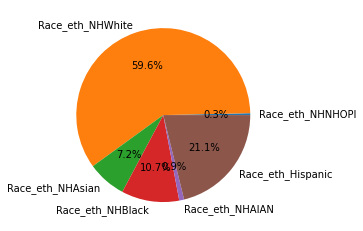

In [18]:
plt.pie(df_race_last_updated['Series_Complete_Yes'], 
        labels=df_race_last_updated['Demographic_category'], 
        autopct = '%1.1f%%')
plt.show()